In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [3]:
# import dataset ke dalam notebook
df = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Dataset\\Raw\climate_vs_flood.csv', header=0)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [4]:
# mengecek jumlah record dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


In [5]:
# mengecek jumlah NaN tiap kolom
df.isna().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [6]:
# mengecek nilai pemusatan data dan distribusi data tiap kolom numerik
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


In [7]:
print("Unique Value of region_name : ", df['region_name'].nunique())
print("Unique Value of station_id : ", df['station_id'].nunique())
print("Unique Value of ddd_car : ", df['ddd_car'].nunique())
print("Unique Value of station_name : ", df['station_name'].nunique())

Unique Value of region_name :  4
Unique Value of station_id :  4
Unique Value of ddd_car :  9
Unique Value of station_name :  4


In [8]:
df['ddd_car'].unique()

array(['S ', 'W ', 'SW', 'E ', 'SE', 'NE', 'C ', 'N ', 'NW', nan],
      dtype=object)

In [9]:
# grouping untuk visualisasi jumlah masing-masing arah mata angin
df_ddd_car_sum = df.groupby('ddd_car', as_index=0).agg(ddd_cnt=('ddd_car', 'count'))
df_ddd_car_sum

,ddd_car,ddd_cnt
0,C,1239
1,E,626
2,N,1681
3,NE,432
4,NW,158
5,S,258
6,SE,235
7,SW,305
8,W,1273


In [10]:
# Apakah stasiun dan region merupakan tempat yang sama?
df_region = df.groupby(['station_id', 'region_name', 'station_name'], as_index=0).agg(station_cnt=('station_id', 'count'))
df_region

,station_id,region_name,station_name,station_cnt
0,96733,Jakarta Selatan,Stasiun Klimatologi Banten,1658
1,96741,Jakarta Utara,Stasiun Meteorologi Maritim Tanjung Priok,1779
2,96745,Jakarta Pusat,Stasiun Meteorologi Kemayoran,1814
3,96747,Jakarta Timur,Halim Perdana Kusuma Jakarta,1057


In [11]:
df_region['station_cnt'].sum()

6308

Total jumlah diatas menunjukkan bahwa di dalam dataset ini hanya terdapat 4 jumlah stasiun saja

### Visualisasi Data

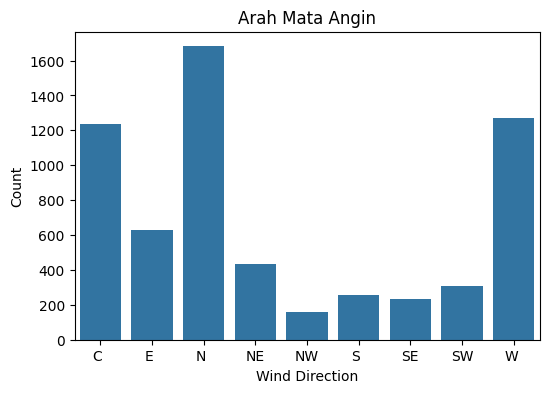

In [12]:
# Jumlah tiap arah mata angin
fig2 = plt.figure(figsize=(6,4))
sns.barplot(data=df_ddd_car_sum, x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.title('Arah Mata Angin')
plt.show()

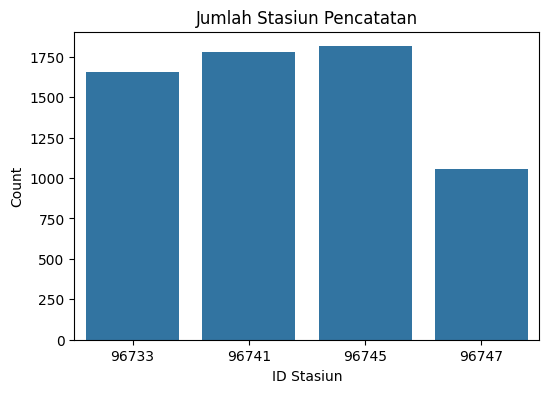

In [13]:
# Jumlah masing-masing stasiun ataupun daerah pencatatan
fig2 = plt.figure(figsize=(6, 4))
sns.barplot(data=df_region, x=df_region['station_id'], y=df_region['station_cnt'])
plt.xlabel('ID Stasiun')
plt.ylabel('Count')
plt.title('Jumlah Stasiun Pencatatan')
plt.show()

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   Tn            5996 non-null   float64       
 2   Tx            6095 non-null   float64       
 3   Tavg          6262 non-null   float64       
 4   RH_avg        6256 non-null   float64       
 5   RR            3993 non-null   float64       
 6   ss            5049 non-null   float64       
 7   ff_x          6286 non-null   float64       
 8   ddd_x         6286 non-null   float64       
 9   ff_avg        6215 non-null   float64       
 10  ddd_car       6207 non-null   object        
 11  station_id    6308 non-null   int64         
 12  station_name  6308 non-null   object        
 13  region_name   6308 non-null   object        
 14  flood         6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [19]:
stasiun_1 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Selatan')]
stasiun_2 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Utara')]
stasiun_3 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Timur')]
stasiun_4 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Pusat')]

In [43]:
stasiun_1.isna().sum()

date              0
Tn               48
Tx               20
Tavg             11
RH_avg           11
RR              781
ss               15
ff_x              0
ddd_x             0
ff_avg            0
ddd_car           1
station_id        0
station_name      0
region_name       0
flood             0
dtype: int64

In [44]:
stasiun_2.isna().sum()

date              0
Tn              233
Tx              174
Tavg             31
RH_avg           33
RR              735
ss              140
ff_x              5
ddd_x             5
ff_avg            5
ddd_car           0
station_id        0
station_name      0
region_name       0
flood             0
dtype: int64

In [45]:
stasiun_3.isna().sum()

date               0
Tn                 2
Tx                 5
Tavg               1
RH_avg             5
RR               571
ss              1057
ff_x              17
ddd_x             17
ff_avg            88
ddd_car          100
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

In [46]:
stasiun_4.isna().sum()

date              0
Tn               29
Tx               14
Tavg              3
RH_avg            3
RR              228
ss               47
ff_x              0
ddd_x             0
ff_avg            0
ddd_car           0
station_id        0
station_name      0
region_name       0
flood             0
dtype: int64

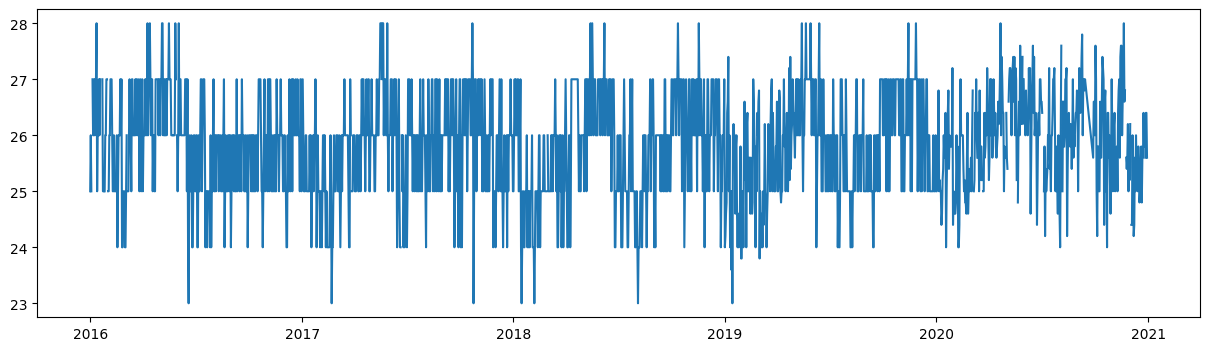

In [28]:
fig = plt.figure(figsize=(15,4))
plt.plot(stasiun_4['date'], stasiun_4['Tn'])

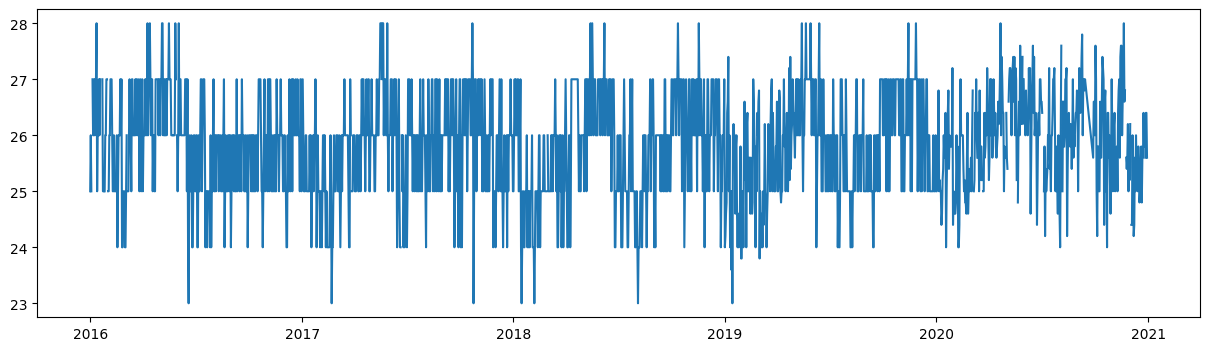

In [29]:
fig = plt.figure(figsize=(15,4))
plt.plot(stasiun_4['date'], stasiun_4['Tn'])

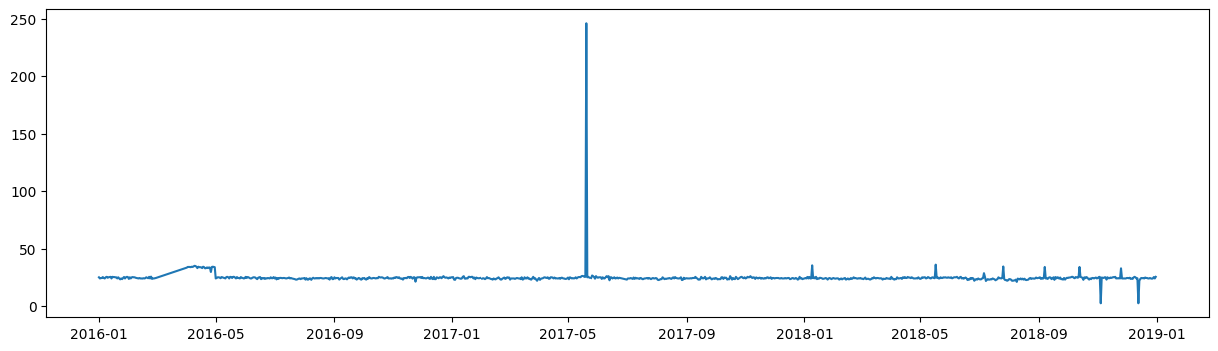

In [26]:
fig = plt.figure(figsize=(15,4))
plt.plot(stasiun_3['date'], stasiun_3['Tn'])

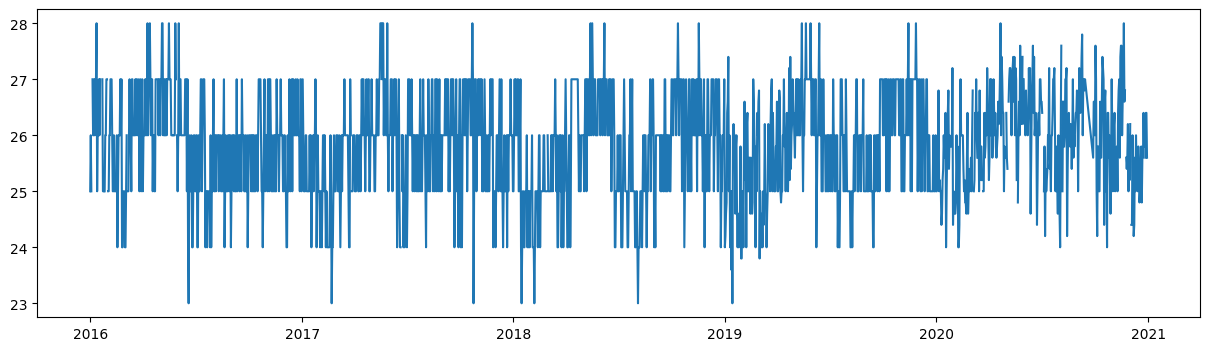

In [27]:
fig = plt.figure(figsize=(15,4))
plt.plot(stasiun_4['date'], stasiun_4['Tn'])

Setelah ditelusuri ternyata pada dataset hanya digabung bukan sesuai urutan tahun tetapi urutan stasiun. Sehingga index pertama hingga index ke-1658 adalah stasiun klimatologi banten yang berada di Jakarta Selatan kemudian seterusnya hingga stasiun terakhir.

In [34]:
df_flood_sum = df.groupby('flood').agg(cat_cnt=('flood', 'count'))
df_flood_sum

,cat_cnt
flood,
0,5832
1,476


Berdasarkan data grouping bisa diketahui kasus dimana tidak banjir ada sebanyak 5832 kasus, sedangkan kasus banjir ada sebanyak 476 kasus

Text(0.5, 1.0, 'Perbandingan Kategori Flood "Yes" & "No"')

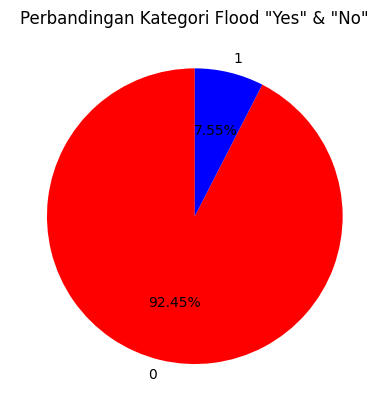

In [41]:
plt.pie(df_flood_sum['cat_cnt'], labels=df_flood_sum.index, startangle=90, autopct='%1.2f%%', colors=['red', 'blue'])
plt.title('Perbandingan Kategori Flood "Yes" & "No"')

Dari visualisasi diatas bisa disimpulkan juga terjadi ketimpangan label kategori yang mana kategori 0 atau tidak banjir memiliki jumlah yang lebih banyak

In [55]:
df_copy = df.copy()
df_copy['month'] = df['date'].dt.month

In [57]:
df_copy

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,month
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12


In [58]:
null_counts = df_copy[df_copy['RR'].isnull()].groupby('month').size()

In [59]:
null_counts

month
1     123
2      97
3     127
4     170
5     220
6     223
7     274
8     269
9     248
10    205
11    164
12    195
dtype: int64

<Axes: xlabel='month', ylabel='None'>

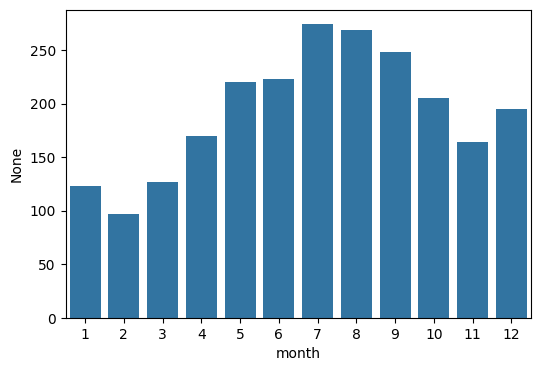

In [62]:
fig = plt.figure(figsize=(6,4))
sns.barplot(x=null_counts.index, y=null_counts)

Dari visualisasi di atas bisa disimpulkan bahwa nilai NaN paling sering ada di bulan-bulan Juni dan Juli yaitu lebih dari 250 nilai

In [64]:
df_copy[(df['RR'].isnull()) & (df['flood']==1)]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,month
41,2016-02-11,25.4,25.4,27.3,89.0,NaN,0.2,3.0,270.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,2
80,2016-07-17,25.6,31.8,27.0,89.0,NaN,7.0,3.0,270.0,1.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,7
86,2016-07-23,23.0,33.6,27.3,83.0,NaN,2.5,3.0,50.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,7
113,2016-08-19,22.0,33.9,28.5,78.0,NaN,3.4,5.0,80.0,1.0,N,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,8
121,2016-08-27,24.0,32.4,26.2,87.0,NaN,4.3,4.0,180.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2018-03-13,24.0,30.8,27.1,82.0,NaN,NaN,6.0,260.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,3
6036,2018-04-04,23.0,34.2,27.9,74.0,NaN,NaN,8.0,270.0,8.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4
6042,2018-04-10,24.2,33.8,28.6,74.0,NaN,NaN,6.0,260.0,6.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4
6049,2018-04-17,24.4,33.2,27.5,80.0,NaN,NaN,6.0,250.0,6.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4
